In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [5]:
df = pd.read_csv(r"C:\Users\ap56j\OneDrive\Documentos\Samsumg\proyecto\BD_IncendiosSNIF_2015-2023_LIMPIOestesi.csv", encoding="latin-1")
df

C:\Users\ap56j\AppData\Local\Temp\ipykernel_15476\746675894.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ap56j\OneDrive\Documentos\Samsumg\proyecto\BD_IncendiosSNIF_2015-2023_LIMPIOestesi.csv", encoding="latin-1")


,Año,latitud_grados,latitud_minutos,latitud_segundos,Latitud,longitud_grados,longitud_minutos,longitud_segundos,Longitud,Estado,...,Duración días,Tipo de incendio,Tipo Vegetación,Régimen de fuego,Tipo impacto,Total hectáreas,Tamaño,Detección,Llegada,Duración
0,2015,31,54,14.50,31.904028,116,58,30.00,-116.975000,baja california,...,1.0,superficial,2,adaptado,1,2.0,1,0.006944444,0.024305556,0.291666667
1,2015,32,25,17.50,32.421528,116,52,55.00,-116.881944,baja california,...,1.0,superficial,2,adaptado,1,38.0,3,0.005555556,0.027777778,0.118055556
2,2015,32,33,26.90,32.557472,116,48,59.00,-116.816389,baja california,...,2.0,superficial,2,adaptado,1,21.0,3,0.003472222,0.010416667,1.013888889
3,2015,32,31,7.60,32.518778,116,43,26.10,-116.723917,baja california,...,1.0,superficial,7,adaptado,0,1.0,0,0.004166667,0.017361111,0.070138889
4,2015,31,57,17.73,31.954925,116,43,15.02,-116.720839,baja california,...,2.0,superficial,2,adaptado,1,80.0,4,0.013888889,0.024305556,1.083333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62436,2023,21,17,18.48,21.288467,103,29,17.76,-103.488267,zacatecas,...,1.0,superficial,1,dependiente,1,92.62,4,00:30:00,05:00:00,19:00:00
62437,2023,21,28,19.81,21.472169,103,39,54.90,-103.665250,zacatecas,...,2.0,superficial,1,dependiente,1,48.28,3,00:10:00,02:50:00,11:30:00
62438,2023,22,50,57.30,22.849250,102,34,29.06,-102.574739,zacatecas,...,1.0,superficial,4,sensible,1,48.94,3,00:30:00,00:00:00,06:00:00
62439,2023,21,29,23.01,21.489725,103,0,0.59,-103.000164,zacatecas,...,1.0,superficial,13,sensible,1,10.62,5,00:03:00,00:00:00,04:00:00


In [6]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62441 entries, 0 to 62440
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                62441 non-null  int64  
 1   latitud_grados     62441 non-null  int64  
 2   latitud_minutos    62441 non-null  int64  
 3   latitud_segundos   62441 non-null  float64
 4   Latitud            62441 non-null  float64
 5   longitud_grados    62441 non-null  int64  
 6   longitud_minutos   62441 non-null  int64  
 7   longitud_segundos  62441 non-null  float64
 8   Longitud           62441 non-null  float64
 9   Estado             62441 non-null  object 
 10  Municipio          62441 non-null  object 
 11  Región             62441 non-null  object 
 12  Predio             62440 non-null  object 
 13  Causa              62441 non-null  int64  
 14  Causa especifica   51982 non-null  object 
 15  Fecha Inicio       62438 non-null  object 
 16  Fecha Termino      624

In [5]:
df = df[df['Tipo impacto'] != 0]
df.describe()

,Año,latitud_grados,latitud_minutos,latitud_segundos,Latitud,longitud_grados,longitud_minutos,longitud_segundos,Longitud,Causa,Duración días,Tipo Vegetación,Tipo impacto,Tamaño
count,62410.000000,62410.000000,62410.000000,62410.000000,62410.000000,62410.000000,62410.000000,62410.000000,62410.000000,62410.000000,62407.000000,62410.000000,62410.000000,62410.000000
mean,2019.133248,20.132687,27.230909,29.981018,20.594864,100.353854,27.182327,29.838927,-100.815181,4.158212,1.600542,2.721086,1.088319,2.458164
std,2.493819,3.191858,17.862730,17.337673,3.202994,4.374982,17.710976,17.345903,4.389948,3.276248,1.221980,3.945023,0.309423,1.841364
min,2015.000000,14.000000,0.000000,0.000000,14.696064,86.000000,0.000000,0.000000,-118.286697,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.000000,19.000000,10.000000,15.000000,19.119112,98.000000,11.000000,14.800000,-103.557962,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2019.000000,19.000000,26.000000,30.000000,19.552042,99.000000,26.000000,29.700000,-99.927150,3.000000,1.000000,1.000000,1.000000,1.000000
75%,2021.000000,20.000000,43.000000,45.000000,20.889139,103.000000,42.000000,44.900000,-98.712722,7.000000,2.000000,1.000000,1.000000,4.000000
max,2023.000000,32.000000,87.000000,61.000000,32.599875,118.000000,59.000000,98.830000,-86.798778,15.000000,7.000000,16.000000,3.000000,6.000000


In [9]:
print(df[df["Tipo impacto"] == 1]["Tipo impacto"].count())
print(df[df["Tipo impacto"] == 2]["Tipo impacto"].count())
print(df[df["Tipo impacto"] == 3]["Tipo impacto"].count())


frecuencia_dias = df['Duración días'].value_counts()
print(frecuencia_dias)


57373
4562
475
Duración días
1.0    42359
2.0    13917
4.0     4416
7.0     1728
0.0       18
Name: count, dtype: int64


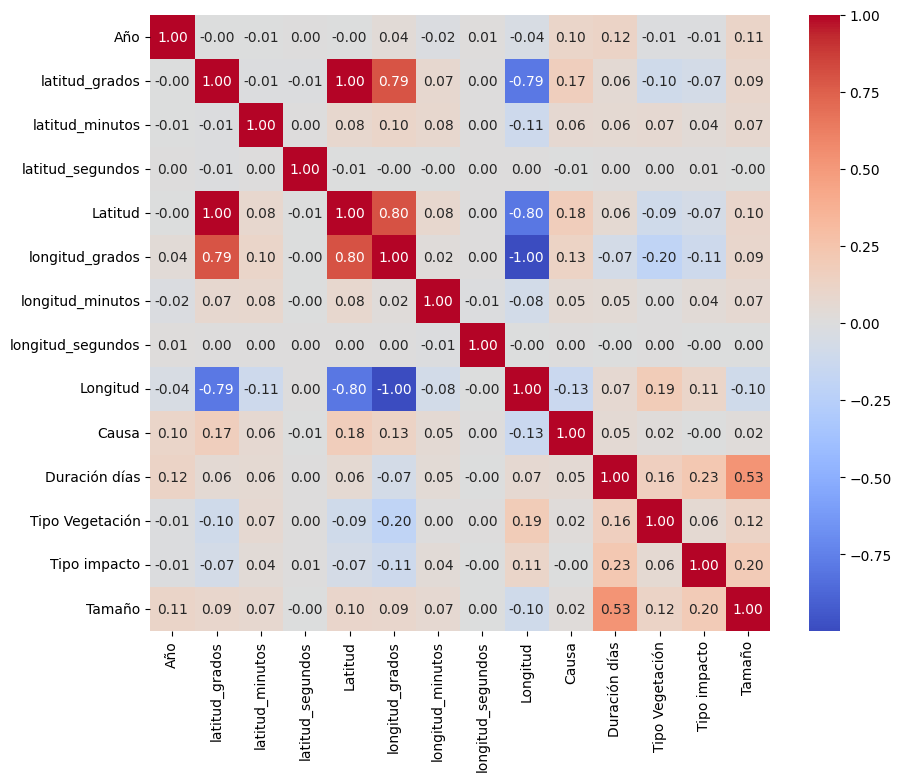

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

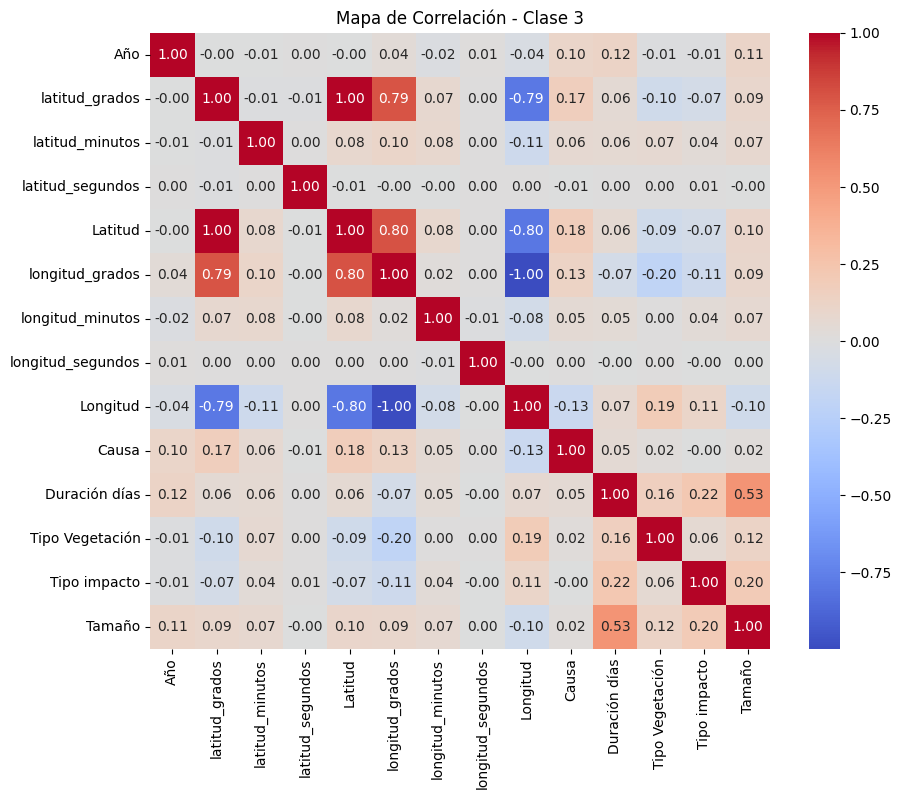

In [22]:
df_clase3 = df[df['Tipo impacto'] == 3]

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Mapa de Correlación - Clase 3")
plt.show()


In [11]:
X = df[['Latitud', 'Longitud', 'Tipo Vegetación', 'Duración días']]
y = df['Tipo impacto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)


In [13]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [7],
    'learning_rate': [0.1],
    'subsample': [0.8, 0.5],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0],
    'scale_pos_weight': [1]
}

# Inicializar el modelo XGBoost
model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best = best_model.predict(X_test) + 1  # Restaurar las clases originales

# Evaluar el modelo optimizado
print("Exactitud (Accuracy) con XGBoost:", accuracy_score(y_test + 1, y_pred_best))
print("\nReporte de Clasificación (con XGBoost):\n", classification_report(y_test + 1, y_pred_best))

# Matriz de confusión con el modelo optimizado
cm_best = confusion_matrix(y_test + 1, y_pred_best, labels=[1, 2, 3])
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=["1", "2", "3"], yticklabels=["1", "2", "3"])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Con XGBoost)')
plt.show()

# Visualizar la distribución de clases después del balanceo
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train + 1, palette='viridis')
plt.title('Distribución de Clases en el Conjunto de Entrenamiento (Después de SMOTE)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ap56j\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ap56j\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "c:\Users\ap56j\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1640, in fit
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]
